# Lab 11: ODEs, Failure Rates, and Evolutionary Games

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
from scipy.integrate import odeint
print ('Modules Imported!')

Modules Imported!


In this lab we're to going analyze evolutionary games using drift analysis. In order to do this, we first need to determine how to integrate ordinary differential equations. So, we begin with a brief exposure of how to achieve this in Python. While we're at it, we'll do a short exercise about failure rate functions.  Then we examine some evolutionary games, using both a stochastic model and a deterministic model, which involves the differential equations.

## Integration of ODEs

This section gives an introdution to integrating ordinary differential equations (odes), with an application to the calculation of a CDF from a failure rate function.  If you recall from your math classes we can describe an ODE as the following:

$\dot{y}=f(y),$ 

where both $y$ and the function $f$ are vector valued, and $\dot{y}$ is shorthand for $\frac{dy}{dt}.$   The variables being vector valued simply implies that we could have a system of dependent one dimensional (1D) ODEs as opposed to just a single one dimensional variable.  Let's look at the following system:

\begin{eqnarray*}
\binom{\dot{y_0}}{\dot{y_1}} = \binom{2y_1-0.1y_0}{-y_0}
\end{eqnarray*}
with the initial condition $y_{init}=\binom{y_1(0)}{y_2(0)}=\binom{1}{1}.$

Our goal in using Python is not to find a closed form solution to the ODE as you would have probably done in your math class, but to numerically integrate it and produce a graphical solution. In order to do this we use the odeint method from scipy.integrate. It takes a function with an initial value and specified times at which the solution is to be output. Internally, the numerical method will often use a much finer grid of time points to solve the ode -- but that is none of your concern.   The times you put in are the times at with the method needs to provide the values of the solution. Look how it is used below:

Text(0.5, 0, 'y_0')

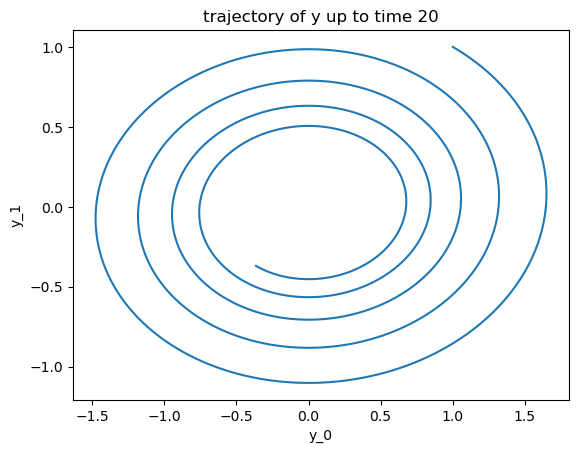

In [2]:
# Simple example integrating a 2d ordinary differential equation (ode) dy/dt=f(y,t) 
# Note that the odeint package is imported in the code at the beginning of this file.

# Function to integrate over
def f(y,t):    
    return np.array([2.*y[1]-.1*y[0],-y[0] ])

time=np.linspace(0.0,20.0,10000)   # The times at which the solution is output.
yinit=np.array([1.0,1.0])   # The initial condition
y=odeint(f,yinit,time)      

plt.plot(y[:,0],y[:,1])
plt.title('trajectory of y up to time 20')
plt.ylabel('y_1')
plt.xlabel('y_0')


Typically in a plot like this you would add an arrow to indicate the direction of time in the graph. However, we know the initial state is $y_{init}=\binom{1}{1}.$ So as time increases, the trajectory moves concentrically inwards in a clockwise fashion. Depending on how much of differential equations you remember, this solution should make sense. The equation happens to have a linear form and can be written as $\dot y = Ay$ where
$
A=\left( \begin{array}{cc}  -0.1  &  2  \\  -1  & 0 \end{array} \right).
$
The eigenvalues of $A$ are complex with negative real parts, so we would expect a decaying oscillatory behavior. (If you didn't follow that, don't worry about it.)

As a simple application of integrating a 1D (one-dimensional) ode, the following code calculates a CDF $F$ from its failure rate function $h.$ But first, let's look at some theory to remember what a failure rate function is. If we let $T$ be a positive random variable with a pdf $f_T$ then
the failure rate function is defined by the following:

$$h(t)=\lim_{\epsilon \to 0} \frac{P(t<T \leq t+\epsilon | T>t)}{\epsilon}$$

Equivalently, an object having failure rate function $h$ means that for any $t > 0,$ given
that the object is still working at time $t$, the probability it will fail in the next
$\epsilon$ time units is $h(t)\epsilon + o(\epsilon)$.  (As usual, $o(\epsilon)$ represents an error term such that $o(\epsilon)/\epsilon \to 0$ as $\epsilon\to 0.$)  With a little bit more derivation (shown in Section 3.9 of your ECE 313 text), we can see that:

$$h(t) = \frac{f_T(t)}{1-F_T(t)}$$

Of course, the pdf $f_T$ is the derivative of the CDF $F_T$. Here's where your 1D ODE comes into play. Given a failure rate function, we want to be able to calculate the CDF. We can easily turn this into an ODE. 

$f_T(t) = (1-F_T(t))h(t)$

Let $F_T(t) = y$ and  $f_T(t) = \frac{dy}{dt} = \dot{y}$, then:

$\dot{y} = (1-y)h(t)$

Now we have our differential equation set up and we can solve it by the same method used in the previous example. For the code below, we define a particular bathtub shaped failure rate function to model the lifetime of a component such as a hard disk drive. There is a high, but decreasing initial rate of failure, followed be a period with a very low rate failure, followed by an increasing rate of failure. You should be able to think of reasons why an object might exhibit this type of failure rate function. Notice that the CDF behaves as we would expect: always between 0 and 1, and reactive to $h(t)$.

If you examine the ECE 313 notes you'll see another way to determine $F_T,$  namely, using
$F_T(t) = 1- \exp \left( \int_o^t -h(s) ds \right)$.  The point here, though, is to get some practice using
odeint, instead of using this formula.

Text(0.5, 0, '$t$')

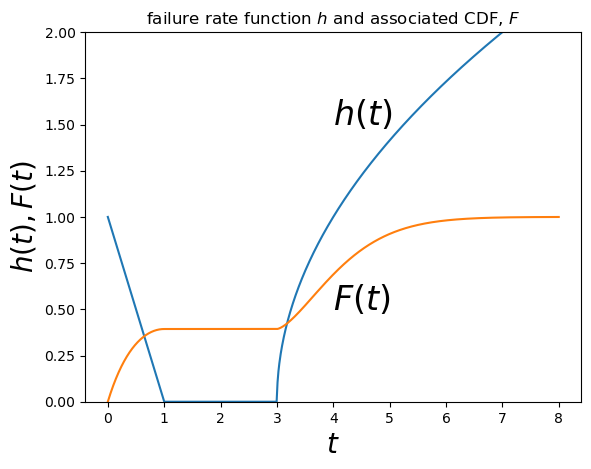

In [3]:
# Calculation of CDF from its failure rate function, using dF/dt=(1-F(t))h(t)
from scipy.integrate import odeint

def h(t):   # h is the failure rate function with a bathtub shape
    if t<1:
        return 1-t
    elif t<3:
        return 0.0
    else:
        return np.sqrt(t-3)
    

def Fdot(y,t):    
    return (1-y)*h(t)

t_max=8.0  #  Select so that F(t_max) is very close to one
time=np.linspace(0.0,t_max,1000)
Finit=0.0
F=odeint(Fdot,Finit,time)

plt.plot(time,list(map(h,time)))
plt.text(4,h(4)+0.5, r'$h(t)$',fontsize=24) #Plots labels in the graph
plt.text(4,0.5, r'$F(t)$',fontsize=24) 

plt.plot(time,F)
plt.title('failure rate function $h$ and associated CDF, $F$')
plt.axis(ymin=0,ymax=2.0)
plt.ylabel('$h(t), F(t)$',fontsize=20)
plt.xlabel('$t$',fontsize=20)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the information on failure rate functions and the example above, do the following:
<ol>
<li> Write code that, given the failure rate function of a random variable $T$, computes the mean lifetime, $E[T].$  Use this code to determine the mean lifetime for the example given above.  (Hint: An easy way to do this problem is to use the area rule for expectations. Since $T$ is nonnegative, the area rule for expectations gives $E[T]=\int_0^\infty(1-F(t)) dt.$
The integral $\int_0^\infty (1-F(t)) dt$ is approximately equal to
$\int_0^{t_{max}} (1-F(t)) dt,$  which, by the definition of Riemann integration, is approximately equal to
$h \sum_{i=1}^{1000} (1-F(h_i)) $ where $h=t_{max}/1000.$  Basically the code above returns the samples $F(h_i)$ so all you need to do is subtract these values from 1, sum them up and multiply by $h$.)
<li> What happens to $E[T]$ if the failure rate function is doubled for all time? Print out the new value of $E[T]$.
</ol>

In [7]:
# Your code here
E = 0.0
for i in range(1000):
    E = E + (1-F[i])*(t_max/1000)
print("Expected value is: ", E)
E = 0.0
for i in range(1000):
    E = E + (1-F[i])*(t_max/500)
print("Expected value is: ", E)


Expected value is:  [2.65652422]
Expected value is:  [5.31304844]


__Answer:__ In the first case Expected value is 2.65652422 and when we double the failure rate function we basically doubled the expected value to 5.31304844

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>** 

## Evolutionary games (replicator dynamics):

Consider a population of individuals, where each individual is of some type.  Suppose individuals have occasional pairwise encounters.  During an encounter the two individuals involved play a two player symmetric game in which the strategies are the types of the individuals.   As a result of the encounter, each of the two individuals produces a number of offspring of its same type, with the number being determined by a fitess table or, equivalently, a fitness matrix.   For example, consider a population of crickets such that each cricket is either small or large.   If two small crickets meet each other then they each spawn five more small crickets.  If a small cricket encounters a large cricket then the small cricket spawns one more small cricket and the large cricket spawns eight new large crickets.   If two large crickets meet then each of them spawns three new large crickets.  We can summarize these outcomes using the following table:
$$\begin{array}{c|cc}  & small & large  \\ \hline
    small & 5 & 1  \\
    large & 8 & 3
    \end{array}$$
or by a fitness matrix
$$F=\left( \begin{array}{cc}  5 & 1 \\ 8 & 3  \end{array}\right).$$ 
Associating 0 with "small" and 1 with "large,"  we see that if a type i individual encounters a type j individual, then the type i individual spawns F[i,j] new individuals of type i, and the type j individual spawns F[j,i] new individuals of type j. Below is a stochastic simulation for this game where we start with a population of four small crickets and four large crickets. It may be a useful exercise for you to think of how the values for $a$ and $b$ were created.


In [13]:
# Stochastic simulation of replicator dynamics for cricket game

F=np.array([[5,1],[8,3]])  # fitness matrix

n=np.array([4,4])  #[number of small crickets, number of large crickets], initialized
print ("                                   State      Fractions of each type")
print ("Initially                        ", n, "      ", n/1./np.sum(n))

T = 10000 #total number of encounters

for k in range(T):   # k tracks number of encounters
    a=n[0]*(n[0]-1.0)/((n[0]+n[1])*(n[0]+n[1]-1))  # probability both players are type 0
    b=2*n[0]*n[1]/((n[0]+n[1])*(n[0]+n[1]-1.0))  # probability one player of each type
    U=np.random.rand()
    if U<=a:
        n+=[2*F[0,0],0]
        print ("Round",k+1,"two small crickets meet ", n, n/1./np.sum(n))
    elif a<U<=a+b:
        n+=[F[0,1],F[1,0]]
        print ("Round",k+1,"a small meets a large   ", n, n/1./np.sum(n))
    else:
        n+=[0,2*F[1,1]]
        print ("Round",k+1,"two large crickets meet ", n, n/1./np.sum(n))


                                   State      Fractions of each type
Initially                         [4 4]        [0.5 0.5]
Round 1 two small crickets meet  [14  4] [0.77777778 0.22222222]
Round 2 a small meets a large    [15 12] [0.55555556 0.44444444]
Round 3 two small crickets meet  [25 12] [0.67567568 0.32432432]
Round 4 two small crickets meet  [35 12] [0.74468085 0.25531915]
Round 5 a small meets a large    [36 20] [0.64285714 0.35714286]
Round 6 a small meets a large    [37 28] [0.56923077 0.43076923]
Round 7 a small meets a large    [38 36] [0.51351351 0.48648649]
Round 8 a small meets a large    [39 44] [0.46987952 0.53012048]
Round 9 a small meets a large    [40 52] [0.43478261 0.56521739]
Round 10 two large crickets meet  [40 58] [0.40816327 0.59183673]
Round 11 two large crickets meet  [40 64] [0.38461538 0.61538462]
Round 12 a small meets a large    [41 72] [0.36283186 0.63716814]
Round 13 two large crickets meet  [41 78] [0.34453782 0.65546218]
Round 14 two large cricke

Round 774 two large crickets meet  [ 148 4806] [0.02987485 0.97012515]
Round 775 two large crickets meet  [ 148 4812] [0.02983871 0.97016129]
Round 776 two large crickets meet  [ 148 4818] [0.02980266 0.97019734]
Round 777 two large crickets meet  [ 148 4824] [0.02976669 0.97023331]
Round 778 two large crickets meet  [ 148 4830] [0.02973082 0.97026918]
Round 779 two large crickets meet  [ 148 4836] [0.02969502 0.97030498]
Round 780 two large crickets meet  [ 148 4842] [0.02965932 0.97034068]
Round 781 two large crickets meet  [ 148 4848] [0.0296237 0.9703763]
Round 782 two large crickets meet  [ 148 4854] [0.02958816 0.97041184]
Round 783 two large crickets meet  [ 148 4860] [0.02955272 0.97044728]
Round 784 two large crickets meet  [ 148 4866] [0.02951735 0.97048265]
Round 785 two large crickets meet  [ 148 4872] [0.02948207 0.97051793]
Round 786 a small meets a large    [ 149 4880] [0.02962816 0.97037184]
Round 787 two large crickets meet  [ 149 4886] [0.02959285 0.97040715]
Round 78

Round 1602 two large crickets meet  [ 192 9862] [0.01909688 0.98090312]
Round 1603 two large crickets meet  [ 192 9868] [0.01908549 0.98091451]
Round 1604 two large crickets meet  [ 192 9874] [0.01907411 0.98092589]
Round 1605 two large crickets meet  [ 192 9880] [0.01906275 0.98093725]
Round 1606 two large crickets meet  [ 192 9886] [0.0190514 0.9809486]
Round 1607 two large crickets meet  [ 192 9892] [0.01904006 0.98095994]
Round 1608 two large crickets meet  [ 192 9898] [0.01902874 0.98097126]
Round 1609 two large crickets meet  [ 192 9904] [0.01901743 0.98098257]
Round 1610 two large crickets meet  [ 192 9910] [0.01900614 0.98099386]
Round 1611 two large crickets meet  [ 192 9916] [0.01899486 0.98100514]
Round 1612 two large crickets meet  [ 192 9922] [0.01898359 0.98101641]
Round 1613 two large crickets meet  [ 192 9928] [0.01897233 0.98102767]
Round 1614 two large crickets meet  [ 192 9934] [0.01896109 0.98103891]
Round 1615 two large crickets meet  [ 192 9940] [0.01894986 0.9810

Round 2342 two large crickets meet  [  221 14334] [0.01518379 0.98481621]
Round 2343 two large crickets meet  [  221 14340] [0.01517753 0.98482247]
Round 2344 two large crickets meet  [  221 14346] [0.01517128 0.98482872]
Round 2345 two large crickets meet  [  221 14352] [0.01516503 0.98483497]
Round 2346 two large crickets meet  [  221 14358] [0.01515879 0.98484121]
Round 2347 two large crickets meet  [  221 14364] [0.01515255 0.98484745]
Round 2348 two large crickets meet  [  221 14370] [0.01514632 0.98485368]
Round 2349 two large crickets meet  [  221 14376] [0.0151401 0.9848599]
Round 2350 two large crickets meet  [  221 14382] [0.01513388 0.98486612]
Round 2351 a small meets a large    [  222 14390] [0.01519299 0.98480701]
Round 2352 two large crickets meet  [  222 14396] [0.01518676 0.98481324]
Round 2353 two large crickets meet  [  222 14402] [0.01518053 0.98481947]
Round 2354 two large crickets meet  [  222 14408] [0.0151743 0.9848257]
Round 2355 two large crickets meet  [  222

Round 2716 two large crickets meet  [  234 16604] [0.01389714 0.98610286]
Round 2717 two large crickets meet  [  234 16610] [0.01389219 0.98610781]
Round 2718 two large crickets meet  [  234 16616] [0.01388724 0.98611276]
Round 2719 two large crickets meet  [  234 16622] [0.0138823 0.9861177]
Round 2720 two large crickets meet  [  234 16628] [0.01387736 0.98612264]
Round 2721 two large crickets meet  [  234 16634] [0.01387242 0.98612758]
Round 2722 two large crickets meet  [  234 16640] [0.01386749 0.98613251]
Round 2723 two large crickets meet  [  234 16646] [0.01386256 0.98613744]
Round 2724 two large crickets meet  [  234 16652] [0.01385763 0.98614237]
Round 2725 two large crickets meet  [  234 16658] [0.01385271 0.98614729]
Round 2726 two large crickets meet  [  234 16664] [0.01384779 0.98615221]
Round 2727 two large crickets meet  [  234 16670] [0.01384288 0.98615712]
Round 2728 two large crickets meet  [  234 16676] [0.01383797 0.98616203]
Round 2729 two large crickets meet  [  2

Round 3078 two large crickets meet  [  241 18790] [0.01266355 0.98733645]
Round 3079 two large crickets meet  [  241 18796] [0.01265956 0.98734044]
Round 3080 two large crickets meet  [  241 18802] [0.01265557 0.98734443]
Round 3081 two large crickets meet  [  241 18808] [0.01265158 0.98734842]
Round 3082 two large crickets meet  [  241 18814] [0.0126476 0.9873524]
Round 3083 two large crickets meet  [  241 18820] [0.01264362 0.98735638]
Round 3084 two large crickets meet  [  241 18826] [0.01263964 0.98736036]
Round 3085 two large crickets meet  [  241 18832] [0.01263566 0.98736434]
Round 3086 two large crickets meet  [  241 18838] [0.01263169 0.98736831]
Round 3087 two large crickets meet  [  241 18844] [0.01262772 0.98737228]
Round 3088 two large crickets meet  [  241 18850] [0.01262375 0.98737625]
Round 3089 two large crickets meet  [  241 18856] [0.01261978 0.98738022]
Round 3090 two large crickets meet  [  241 18862] [0.01261582 0.98738418]
Round 3091 two large crickets meet  [  2

Round 3467 two large crickets meet  [  248 21138] [0.01159637 0.98840363]
Round 3468 two large crickets meet  [  248 21144] [0.01159312 0.98840688]
Round 3469 two large crickets meet  [  248 21150] [0.01158987 0.98841013]
Round 3470 two large crickets meet  [  248 21156] [0.01158662 0.98841338]
Round 3471 two large crickets meet  [  248 21162] [0.01158337 0.98841663]
Round 3472 two large crickets meet  [  248 21168] [0.01158013 0.98841987]
Round 3473 two large crickets meet  [  248 21174] [0.01157688 0.98842312]
Round 3474 two large crickets meet  [  248 21180] [0.01157364 0.98842636]
Round 3475 two large crickets meet  [  248 21186] [0.0115704 0.9884296]
Round 3476 two large crickets meet  [  248 21192] [0.01156716 0.98843284]
Round 3477 two large crickets meet  [  248 21198] [0.01156393 0.98843607]
Round 3478 two large crickets meet  [  248 21204] [0.01156069 0.98843931]
Round 3479 two large crickets meet  [  248 21210] [0.01155746 0.98844254]
Round 3480 two large crickets meet  [  2

Round 3897 two large crickets meet  [  262 23746] [0.01091303 0.98908697]
Round 3898 two large crickets meet  [  262 23752] [0.0109103 0.9890897]
Round 3899 two large crickets meet  [  262 23758] [0.01090758 0.98909242]
Round 3900 two large crickets meet  [  262 23764] [0.01090485 0.98909515]
Round 3901 two large crickets meet  [  262 23770] [0.01090213 0.98909787]
Round 3902 two large crickets meet  [  262 23776] [0.01089941 0.98910059]
Round 3903 two large crickets meet  [  262 23782] [0.01089669 0.98910331]
Round 3904 two large crickets meet  [  262 23788] [0.01089397 0.98910603]
Round 3905 two large crickets meet  [  262 23794] [0.01089125 0.98910875]
Round 3906 two large crickets meet  [  262 23800] [0.01088854 0.98911146]
Round 3907 two large crickets meet  [  262 23806] [0.01088582 0.98911418]
Round 3908 two large crickets meet  [  262 23812] [0.01088311 0.98911689]
Round 3909 two large crickets meet  [  262 23818] [0.0108804 0.9891196]
Round 3910 two large crickets meet  [  262

Round 4266 two large crickets meet  [  267 25970] [0.01017647 0.98982353]
Round 4267 two large crickets meet  [  267 25976] [0.01017414 0.98982586]
Round 4268 two large crickets meet  [  267 25982] [0.01017182 0.98982818]
Round 4269 two large crickets meet  [  267 25988] [0.01016949 0.98983051]
Round 4270 two large crickets meet  [  267 25994] [0.01016717 0.98983283]
Round 4271 two large crickets meet  [  267 26000] [0.01016485 0.98983515]
Round 4272 two large crickets meet  [  267 26006] [0.01016252 0.98983748]
Round 4273 two large crickets meet  [  267 26012] [0.0101602 0.9898398]
Round 4274 two large crickets meet  [  267 26018] [0.01015788 0.98984212]
Round 4275 two large crickets meet  [  267 26024] [0.01015557 0.98984443]
Round 4276 two large crickets meet  [  267 26030] [0.01015325 0.98984675]
Round 4277 two large crickets meet  [  267 26036] [0.01015093 0.98984907]
Round 4278 a small meets a large    [  268 26044] [0.01018547 0.98981453]
Round 4279 two large crickets meet  [  2

Round 4887 two large crickets meet  [  278 29718] [0.0092679 0.9907321]
Round 4888 two large crickets meet  [  278 29724] [0.00926605 0.99073395]
Round 4889 two large crickets meet  [  278 29730] [0.0092642 0.9907358]
Round 4890 two large crickets meet  [  278 29736] [0.00926234 0.99073766]
Round 4891 two large crickets meet  [  278 29742] [0.00926049 0.99073951]
Round 4892 two large crickets meet  [  278 29748] [0.00925864 0.99074136]
Round 4893 two large crickets meet  [  278 29754] [0.00925679 0.99074321]
Round 4894 two large crickets meet  [  278 29760] [0.00925494 0.99074506]
Round 4895 two large crickets meet  [  278 29766] [0.0092531 0.9907469]
Round 4896 two large crickets meet  [  278 29772] [0.00925125 0.99074875]
Round 4897 two large crickets meet  [  278 29778] [0.0092494 0.9907506]
Round 4898 two large crickets meet  [  278 29784] [0.00924756 0.99075244]
Round 4899 two large crickets meet  [  278 29790] [0.00924571 0.99075429]
Round 4900 two large crickets meet  [  278 297

Round 5310 two large crickets meet  [  288 32276] [0.00884412 0.99115588]
Round 5311 two large crickets meet  [  288 32282] [0.00884249 0.99115751]
Round 5312 two large crickets meet  [  288 32288] [0.00884086 0.99115914]
Round 5313 two large crickets meet  [  288 32294] [0.00883924 0.99116076]
Round 5314 two large crickets meet  [  288 32300] [0.00883761 0.99116239]
Round 5315 two large crickets meet  [  288 32306] [0.00883598 0.99116402]
Round 5316 two large crickets meet  [  288 32312] [0.00883436 0.99116564]
Round 5317 two large crickets meet  [  288 32318] [0.00883273 0.99116727]
Round 5318 two large crickets meet  [  288 32324] [0.00883111 0.99116889]
Round 5319 two large crickets meet  [  288 32330] [0.00882948 0.99117052]
Round 5320 two large crickets meet  [  288 32336] [0.00882786 0.99117214]
Round 5321 two large crickets meet  [  288 32342] [0.00882623 0.99117377]
Round 5322 two large crickets meet  [  288 32348] [0.00882461 0.99117539]
Round 5323 two large crickets meet  [ 

Round 5714 two large crickets meet  [  303 34704] [0.00865541 0.99134459]
Round 5715 two large crickets meet  [  303 34710] [0.00865393 0.99134607]
Round 5716 two large crickets meet  [  303 34716] [0.00865245 0.99134755]
Round 5717 two large crickets meet  [  303 34722] [0.00865096 0.99134904]
Round 5718 two large crickets meet  [  303 34728] [0.00864948 0.99135052]
Round 5719 two large crickets meet  [  303 34734] [0.008648 0.991352]
Round 5720 two large crickets meet  [  303 34740] [0.00864652 0.99135348]
Round 5721 two large crickets meet  [  303 34746] [0.00864504 0.99135496]
Round 5722 two large crickets meet  [  303 34752] [0.00864356 0.99135644]
Round 5723 two large crickets meet  [  303 34758] [0.00864208 0.99135792]
Round 5724 two large crickets meet  [  303 34764] [0.0086406 0.9913594]
Round 5725 two large crickets meet  [  303 34770] [0.00863912 0.99136088]
Round 5726 two large crickets meet  [  303 34776] [0.00863765 0.99136235]
Round 5727 two large crickets meet  [  303 3

Round 6413 two large crickets meet  [  313 38918] [0.00797838 0.99202162]
Round 6414 two large crickets meet  [  313 38924] [0.00797716 0.99202284]
Round 6415 two large crickets meet  [  313 38930] [0.00797594 0.99202406]
Round 6416 two large crickets meet  [  313 38936] [0.00797473 0.99202527]
Round 6417 two large crickets meet  [  313 38942] [0.00797351 0.99202649]
Round 6418 two large crickets meet  [  313 38948] [0.00797229 0.99202771]
Round 6419 two large crickets meet  [  313 38954] [0.00797107 0.99202893]
Round 6420 two large crickets meet  [  313 38960] [0.00796985 0.99203015]
Round 6421 two large crickets meet  [  313 38966] [0.00796863 0.99203137]
Round 6422 two large crickets meet  [  313 38972] [0.00796742 0.99203258]
Round 6423 two large crickets meet  [  313 38978] [0.0079662 0.9920338]
Round 6424 two large crickets meet  [  313 38984] [0.00796498 0.99203502]
Round 6425 two large crickets meet  [  313 38990] [0.00796377 0.99203623]
Round 6426 two large crickets meet  [  3

Round 6739 two large crickets meet  [  319 40886] [0.00774178 0.99225822]
Round 6740 two large crickets meet  [  319 40892] [0.00774065 0.99225935]
Round 6741 two large crickets meet  [  319 40898] [0.00773952 0.99226048]
Round 6742 two large crickets meet  [  319 40904] [0.0077384 0.9922616]
Round 6743 two large crickets meet  [  319 40910] [0.00773727 0.99226273]
Round 6744 two large crickets meet  [  319 40916] [0.00773615 0.99226385]
Round 6745 two large crickets meet  [  319 40922] [0.00773502 0.99226498]
Round 6746 two large crickets meet  [  319 40928] [0.0077339 0.9922661]
Round 6747 two large crickets meet  [  319 40934] [0.00773277 0.99226723]
Round 6748 two large crickets meet  [  319 40940] [0.00773165 0.99226835]
Round 6749 two large crickets meet  [  319 40946] [0.00773052 0.99226948]
Round 6750 two large crickets meet  [  319 40952] [0.0077294 0.9922706]
Round 6751 two large crickets meet  [  319 40958] [0.00772827 0.99227173]
Round 6752 two large crickets meet  [  319 4

Round 7008 two large crickets meet  [  326 42514] [0.00760971 0.99239029]
Round 7009 two large crickets meet  [  326 42520] [0.00760864 0.99239136]
Round 7010 two large crickets meet  [  326 42526] [0.00760758 0.99239242]
Round 7011 two large crickets meet  [  326 42532] [0.00760651 0.99239349]
Round 7012 two large crickets meet  [  326 42538] [0.00760545 0.99239455]
Round 7013 two large crickets meet  [  326 42544] [0.00760439 0.99239561]
Round 7014 two large crickets meet  [  326 42550] [0.00760332 0.99239668]
Round 7015 two large crickets meet  [  326 42556] [0.00760226 0.99239774]
Round 7016 two large crickets meet  [  326 42562] [0.00760119 0.99239881]
Round 7017 two large crickets meet  [  326 42568] [0.00760013 0.99239987]
Round 7018 two large crickets meet  [  326 42574] [0.00759907 0.99240093]
Round 7019 two large crickets meet  [  326 42580] [0.007598 0.992402]
Round 7020 two large crickets meet  [  326 42586] [0.00759694 0.99240306]
Round 7021 two large crickets meet  [  326

Round 7348 two large crickets meet  [  330 44562] [0.00735098 0.99264902]
Round 7349 two large crickets meet  [  330 44568] [0.00734999 0.99265001]
Round 7350 a small meets a large    [  331 44576] [0.00737079 0.99262921]
Round 7351 two large crickets meet  [  331 44582] [0.0073698 0.9926302]
Round 7352 two large crickets meet  [  331 44588] [0.00736882 0.99263118]
Round 7353 two large crickets meet  [  331 44594] [0.00736784 0.99263216]
Round 7354 two large crickets meet  [  331 44600] [0.00736685 0.99263315]
Round 7355 two large crickets meet  [  331 44606] [0.00736587 0.99263413]
Round 7356 two large crickets meet  [  331 44612] [0.00736488 0.99263512]
Round 7357 two large crickets meet  [  331 44618] [0.0073639 0.9926361]
Round 7358 two large crickets meet  [  331 44624] [0.00736292 0.99263708]
Round 7359 two large crickets meet  [  331 44630] [0.00736194 0.99263806]
Round 7360 two large crickets meet  [  331 44636] [0.00736095 0.99263905]
Round 7361 two large crickets meet  [  331

C:\Users\shIVI\AppData\Local\Temp\ipykernel_2836\123637582.py:12: RuntimeWarning: overflow encountered in scalar multiply
  a=n[0]*(n[0]-1.0)/((n[0]+n[1])*(n[0]+n[1]-1))  # probability both players are type 0


Round 7699 two large crickets meet  [  335 46678] [0.00712569 0.99287431]
Round 7700 two large crickets meet  [  335 46684] [0.00712478 0.99287522]
Round 7701 two large crickets meet  [  335 46690] [0.00712387 0.99287613]
Round 7702 two large crickets meet  [  335 46696] [0.00712296 0.99287704]
Round 7703 two large crickets meet  [  335 46702] [0.00712205 0.99287795]
Round 7704 two large crickets meet  [  335 46708] [0.00712114 0.99287886]
Round 7705 two large crickets meet  [  335 46714] [0.00712024 0.99287976]
Round 7706 two large crickets meet  [  335 46720] [0.00711933 0.99288067]
Round 7707 two large crickets meet  [  335 46726] [0.00711842 0.99288158]
Round 7708 two large crickets meet  [  335 46732] [0.00711751 0.99288249]
Round 7709 two large crickets meet  [  335 46738] [0.00711661 0.99288339]
Round 7710 two large crickets meet  [  335 46744] [0.0071157 0.9928843]
Round 7711 two large crickets meet  [  335 46750] [0.00711479 0.99288521]
Round 7712 two large crickets meet  [  3

Round 8068 two large crickets meet  [  339 48900] [0.00688479 0.99311521]
Round 8069 two large crickets meet  [  339 48906] [0.00688395 0.99311605]
Round 8070 two large crickets meet  [  339 48912] [0.00688311 0.99311689]
Round 8071 two large crickets meet  [  339 48918] [0.00688227 0.99311773]
Round 8072 two large crickets meet  [  339 48924] [0.00688143 0.99311857]
Round 8073 two large crickets meet  [  339 48930] [0.00688059 0.99311941]
Round 8074 two large crickets meet  [  339 48936] [0.00687976 0.99312024]
Round 8075 two large crickets meet  [  339 48942] [0.00687892 0.99312108]
Round 8076 two large crickets meet  [  339 48948] [0.00687808 0.99312192]
Round 8077 two large crickets meet  [  339 48954] [0.00687724 0.99312276]
Round 8078 two large crickets meet  [  339 48960] [0.00687641 0.99312359]
Round 8079 two large crickets meet  [  339 48966] [0.00687557 0.99312443]
Round 8080 two large crickets meet  [  339 48972] [0.00687473 0.99312527]
Round 8081 two large crickets meet  [ 

Round 8331 two large crickets meet  [  342 50484] [0.00672884 0.99327116]
Round 8332 two large crickets meet  [  342 50490] [0.00672805 0.99327195]
Round 8333 two large crickets meet  [  342 50496] [0.00672725 0.99327275]
Round 8334 two large crickets meet  [  342 50502] [0.00672646 0.99327354]
Round 8335 two large crickets meet  [  342 50508] [0.00672566 0.99327434]
Round 8336 two large crickets meet  [  342 50514] [0.00672487 0.99327513]
Round 8337 two large crickets meet  [  342 50520] [0.00672408 0.99327592]
Round 8338 two large crickets meet  [  342 50526] [0.00672328 0.99327672]
Round 8339 two large crickets meet  [  342 50532] [0.00672249 0.99327751]
Round 8340 two large crickets meet  [  342 50538] [0.0067217 0.9932783]
Round 8341 two large crickets meet  [  342 50544] [0.00672091 0.99327909]
Round 8342 two large crickets meet  [  342 50550] [0.00672011 0.99327989]
Round 8343 two large crickets meet  [  342 50556] [0.00671932 0.99328068]
Round 8344 two large crickets meet  [  3

Round 8727 two large crickets meet  [  345 52866] [0.00648362 0.99351638]
Round 8728 two large crickets meet  [  345 52872] [0.00648289 0.99351711]
Round 8729 two large crickets meet  [  345 52878] [0.00648216 0.99351784]
Round 8730 two large crickets meet  [  345 52884] [0.00648143 0.99351857]
Round 8731 two large crickets meet  [  345 52890] [0.0064807 0.9935193]
Round 8732 two large crickets meet  [  345 52896] [0.00647997 0.99352003]
Round 8733 two large crickets meet  [  345 52902] [0.00647924 0.99352076]
Round 8734 two large crickets meet  [  345 52908] [0.00647851 0.99352149]
Round 8735 two large crickets meet  [  345 52914] [0.00647778 0.99352222]
Round 8736 two large crickets meet  [  345 52920] [0.00647705 0.99352295]
Round 8737 two large crickets meet  [  345 52926] [0.00647632 0.99352368]
Round 8738 two large crickets meet  [  345 52932] [0.00647559 0.99352441]
Round 8739 two large crickets meet  [  345 52938] [0.00647486 0.99352514]
Round 8740 two large crickets meet  [  3

Round 9198 two large crickets meet  [  351 55704] [0.00626171 0.99373829]
Round 9199 two large crickets meet  [  351 55710] [0.00626104 0.99373896]
Round 9200 two large crickets meet  [  351 55716] [0.00626037 0.99373963]
Round 9201 two large crickets meet  [  351 55722] [0.0062597 0.9937403]
Round 9202 two large crickets meet  [  351 55728] [0.00625903 0.99374097]
Round 9203 two large crickets meet  [  351 55734] [0.00625836 0.99374164]
Round 9204 two large crickets meet  [  351 55740] [0.00625769 0.99374231]
Round 9205 two large crickets meet  [  351 55746] [0.00625702 0.99374298]
Round 9206 two large crickets meet  [  351 55752] [0.00625635 0.99374365]
Round 9207 two large crickets meet  [  351 55758] [0.00625568 0.99374432]
Round 9208 two large crickets meet  [  351 55764] [0.00625501 0.99374499]
Round 9209 two large crickets meet  [  351 55770] [0.00625434 0.99374566]
Round 9210 two large crickets meet  [  351 55776] [0.00625367 0.99374633]
Round 9211 two large crickets meet  [  3

Round 9593 two large crickets meet  [  354 58080] [0.00605812 0.99394188]
Round 9594 two large crickets meet  [  354 58086] [0.00605749 0.99394251]
Round 9595 two large crickets meet  [  354 58092] [0.00605687 0.99394313]
Round 9596 two large crickets meet  [  354 58098] [0.00605625 0.99394375]
Round 9597 two large crickets meet  [  354 58104] [0.00605563 0.99394437]
Round 9598 two large crickets meet  [  354 58110] [0.00605501 0.99394499]
Round 9599 two large crickets meet  [  354 58116] [0.00605439 0.99394561]
Round 9600 two large crickets meet  [  354 58122] [0.00605377 0.99394623]
Round 9601 two large crickets meet  [  354 58128] [0.00605314 0.99394686]
Round 9602 two large crickets meet  [  354 58134] [0.00605252 0.99394748]
Round 9603 two large crickets meet  [  354 58140] [0.0060519 0.9939481]
Round 9604 two large crickets meet  [  354 58146] [0.00605128 0.99394872]
Round 9605 two large crickets meet  [  354 58152] [0.00605066 0.99394934]
Round 9606 two large crickets meet  [  3

Round 9952 two large crickets meet  [  362 60250] [0.00597241 0.99402759]
Round 9953 two large crickets meet  [  362 60256] [0.00597182 0.99402818]
Round 9954 two large crickets meet  [  362 60262] [0.00597123 0.99402877]
Round 9955 two large crickets meet  [  362 60268] [0.00597064 0.99402936]
Round 9956 two large crickets meet  [  362 60274] [0.00597005 0.99402995]
Round 9957 two large crickets meet  [  362 60280] [0.00596946 0.99403054]
Round 9958 two large crickets meet  [  362 60286] [0.00596887 0.99403113]
Round 9959 two large crickets meet  [  362 60292] [0.00596828 0.99403172]
Round 9960 two large crickets meet  [  362 60298] [0.00596769 0.99403231]
Round 9961 two large crickets meet  [  362 60304] [0.0059671 0.9940329]
Round 9962 two large crickets meet  [  362 60310] [0.00596651 0.99403349]
Round 9963 two large crickets meet  [  362 60316] [0.00596592 0.99403408]
Round 9964 two large crickets meet  [  362 60322] [0.00596533 0.99403467]
Round 9965 two large crickets meet  [  3

The above simulation displays, after each encounter, the number of individuals of each type and the fraction of individuals of each type.   Run the simulation multiple times for different initial conditions.  
<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>**  Answer the following questions.   You do not need to provide code for this problem, but explain your answers.  
<ol>
<li> How quickly does the total population grow if initally all the crickets are small?  
<li> How quickly does the total population grow if initally all the crickets are large? 
<li> Do the fractions converge to a stable equilibrium in which the fractions of both small and large crickets are nonzero? (To explore convergence you may need to increase the number of encounters simulated.)
</ol>

__Answer:__ If we start with only small crickets, the total population grows at a rate of 10 crickets per day((1004-4)/100). If we start with only small crickets, the total population grows at a rate of 6 crickets per day((604-4)/100). Yes the fractions coverge to primarily being domainted by large crickets with very few small crickets in the population.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>** 

The code given next is essentially the same as above.  One difference is a time variable is added such that the average rate that an individual cricket has encounters is proportional to the total number of crickets.  This results in exponential growth of the population with time.    Another difference is that population sizes are saved and plotted.

Text(0.5, 1.0, 'Numbers of small and large crickets vs. time (simulation)')

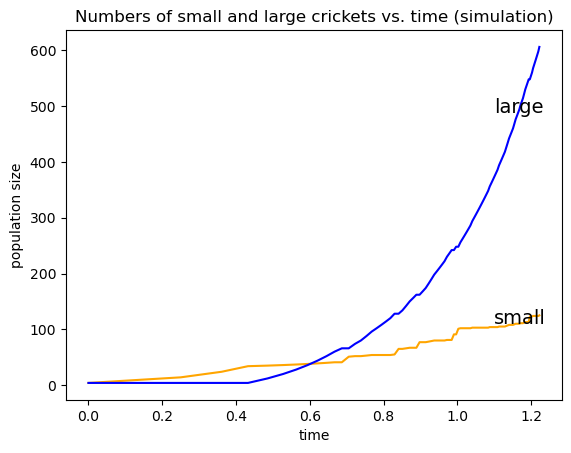

In [14]:
# Stochastic simulation of replicator dynamics for cricket game
# Time is scaled so contact rate of each individual is one per unit time
# The evolution trajectory is stored an plotted

F=np.array([[5,1],[8,3]])  # fitness matrix
n_max=100  # maximum number of interactions
n=np.zeros((n_max,2),dtype=float)
time=np.zeros(n_max,dtype=float)

n[0,0], n[0,1] = 4,4 # initial [number of small crickets, number of large crickets]

for k in range(n_max-1):
    time[k+1]=time[k]+2.0/sum(n[k,:])   # The 2 is here because two individuals make contact at a time
    a=n[k,0]*(n[k,0]-1.0)/((n[k,0]+n[k,1])*(n[k,0]+n[k,1]-1))  # probability both players are type 0
    b=2*n[k,0]*n[k,1]/((n[k,0]+n[k,1])*(n[k,0]+n[k,1]-1.0))  # probability one player of each type
    U=np.random.rand()
    if U<=a:
        n[k+1,:]= n[k,:] + [2*F[0,0],0]
    elif a<U<=a+b:
        n[k+1,:]=n[k,:] + [F[0,1],F[1,0]]
    else:
        n[k+1,:]= n[k,:] + [0,2*F[1,1]]

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.text(1.1,n[80,0], r'small',fontsize=14)
plt.text(1.1,n[80,1], r'large',fontsize=14)
plt.xlabel('time')
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (simulation)")


The following code computes the deterministic analog of the cricket evolution.  The basic idea is that if the current population is [n[0], n[1]] then the drift (i.e. the expected rate of increase) of n[0] is n[0]  multiplied by the expected number of small crickets generated by a small cricket if an encounter happens.  That is true because each of the existing small crikets is having encounters at expected rate one.   To calculate the mean number of new small crickets generated by the encounter of a small cricket with a randomly selected other cricket, we use the law of total probability.  The encountered cricket is type zero with probabiity n[0]/(n[0]+n[1]), which results in F[0,0] new crickets of type zero, and the encountered cricket is type one with probability n[1]/(n[0]+n[1]), which results in F[0,1] new crickets of type zero.   Combining we get
$$
\dot{n}[0] = n[0]*(F[0,0]*n[0]+F[0,1]*n[1])/(n[0]+n[1])
$$
The equation just derived is based on the law of large numbers (LLN).  If the population is fairly large then no one individual plays a major role in the evolution.  Over a small period of time the ratios of small and large crickets is nearly constant, so the number of new crickets of each type in each time slot are nearly independent and identically distributed.   The LLN suggests approximating the sum of number of individuals of each type by the expected numbers of individuals of each type.  That's how we arrive at a deterministic differential equation.

A similar expression holds for the derivative of n[1], and the two equations can be writen in matrix form as
$$
\dot{n} = diag(n)*F*n/sum(n)
$$
where diag(n) is the diagonal matrix with n[0] and n[1] on the diagonal, and "$*$" represents usual matrix multiplication.   (In the python code below, "$*$" denotes element by element multiplication, which is used instead of creating a diagonal matrix, and np.dot is used for ordinary matrix multiplication.)

Text(0.5, 1.0, 'Numbers of small and large crickets vs. time (ode prediction)')

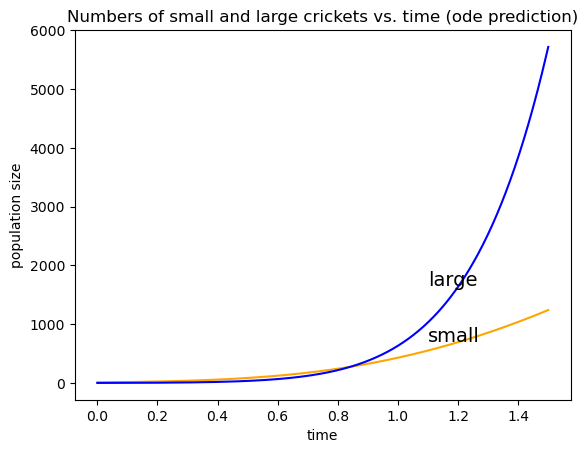

In [37]:
# Deterministic (ODE) replicator dynamics for cricket game
from scipy.integrate import odeint

F=np.array([[5,1],[8,3]])  # fitness matrix

def f(n,t):
    return (n*np.dot(F,n)/sum(n)/1.)

ninit=[10,1]    # initial [number of small crickets, number of large crickets]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,ninit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'small',fontsize=14)
plt.text(1.1,n[800,1], r'large',fontsize=14)
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (ode prediction)")

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Run the code above and compare the output to the output of the previous code for stochastic evolutionary dynamics.  Try different intial conditions such as [0,4], [4,0], and [10,1]. Comment on how the result of this compares to our previous simulation. Is the behavior similar?

__Answer__: The behavior is similiar since even the only one large cricket present in the initial conditions, it has a has a higher prediction value. For the only small and only large cricket cases they both followed the same exponential model for thier respective case. 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>** 

If we let $\theta[0]=\frac{n[0]}{n[0]+n[1]}$ and $\theta[1]=\frac{n[1]}{n[0]+n[1]}$ then the vector $\theta=\binom{\theta[0]}{\theta[1]}$ describes the fractions of the popuation of each type.  It's entries sum to one.  Using the chain rule of calculus we can derive the following differential equation for $\theta$ from the above ode for $n$:
$$
\dot{\theta} = diag(\theta) \left( F\theta - \mathbf{1} \theta^T F \theta \right)
$$
where $\mathbf{1}$ is the column vector of ones (the derivation is a bit involved, try deriving it by yourself if interested, but it is not required). The two components of the vector $F \theta$ give the average fitness level of small crickets and large crickets, respectively, in an encounter with a cricket selected randomly from the population.   And $\theta^T F \theta$ is the weighted average of that vector, giving the average fitness over all crickets in the population.   Thus, $\theta[0]$ is increasing exactly when the fitness of small crickets is greater than the average fitness.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**

1. Modify the above code to integrate the equation for the $\theta$ vector to obtain $\theta$ vs. time.
To check your answer, compare it to what you get by first computing the trajectory of $n$ and then calculating $\theta$ from $n.$  (The code given above for deterministic evolution of n works for any number of types, not just two types. A problem below involves three types of individuals, so it'd be nice if you could implement your code for computing $\theta$ to work for any number of types.) __Be careful when you write your program, since matrix multiplication in Python can be tricky. Understand "$*$" multiplication and np.dot multiplication first. After each small step, debug, confirm, then proceed.__ 
2. Using the fact that $\theta[1]=1-\theta[0],$  a differential equation can be derived for the variable $\theta[0]$ alone.
Plot the function $h$ on the interval $[0,1]$ such that $\dot{\theta}[0]=h(\theta[0]).$ Note that the horizontal axis of the graph is $\theta$, the vertical axis is $\dot{\theta}$. (You can just do this
numerically.  It can also be done algebrically; in fact $h$ is a cubic polynomial, but it is a bit complicated to find the polynomial.)
3. What are the zeroes of $h$ (those are the equilibrium points of $\theta[0]$)?  Which of those are stable (in the sense that if $\theta[0]$ is slightly moved away from the equilibrium point, it returns to the equilibrium point)?

Text(0.5, 1.0, 'Theta vs Time')

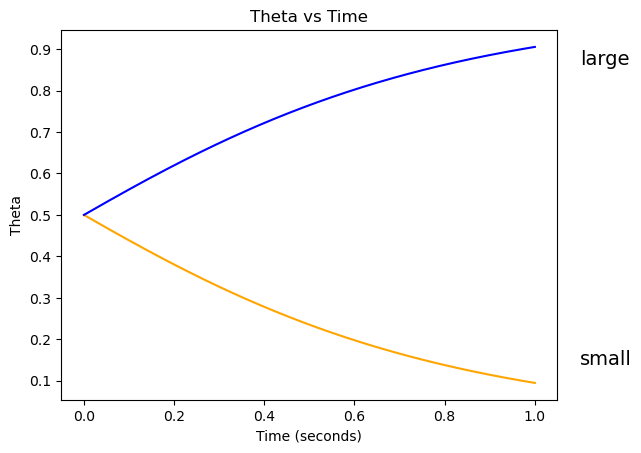

In [44]:
# Your code here
theta_zero = ninit[0]*1.0/(ninit[0]+ninit[1])
theta_one = ninit[1]*1.0/(ninit[0]+ninit[1])
theta = [theta_zero,theta_one]

def integrate(theta, t):
    diag = np.array([[theta[0],0],
                     [0,theta[1]]])
    f_theta = np.dot(F,theta)
    theta_t = np.array([[theta[0],theta[1]],
                        [theta[0],theta[1]]])
    return np.dot(diag, f_theta - np.dot(theta_t, f_theta))
init = np.array([0.5,0.5])

new_theta = odeint(integrate, init, time)

plt.plot(time,new_theta[:,0],'orange',label = 'Small cricket')
plt.plot(time,new_theta[:,1],'blue',label = 'Large cricket')
plt.text(1.1,new_theta[800,0], r'small',fontsize=14)
plt.text(1.1,new_theta[800,1], r'large',fontsize=14)
plt.xlabel('Time (seconds)')
plt.ylabel('Theta')
plt.title('Theta vs Time')

Text(0.5, 1.0, 'h[theta] vs Time')

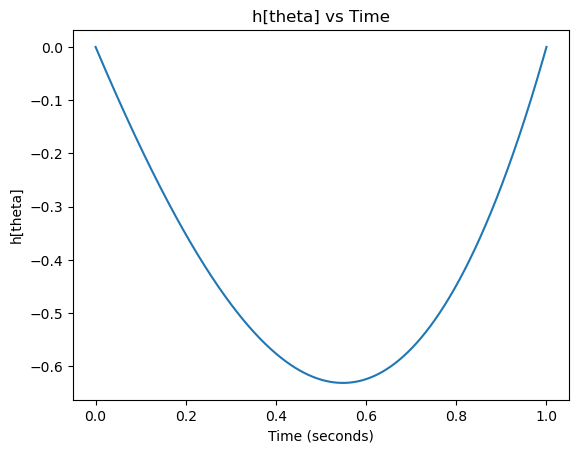

In [48]:
t = np.linspace(0.0, 1.0, 1000)
def integrate2(theta):
    f_theta = np.dot(F,theta)
    theta_t = np.array([[theta[0],theta[1]],
                        [theta[0],theta[1]]])
    return theta*(f_theta - np.dot(theta_t, f_theta))

theta = [integrate2([x, 1-x])[0] for x in time]
plt.plot(t, theta)
plt.xlabel('Time (seconds)')
plt.ylabel('h[theta]')
plt.title('h[theta] vs Time')

__Answer:__ There are zeros at theta = 0,1. Only theta = 0 is stable since looking the graph from part 1 the small crickets converge to zero.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>** 

The overall behavior in evolutionary games depends heavily on the fitness matrix $F.$   Another choice of $F$ corresponds to the so-called doves and hawks evolution game, for which the fitness matrix is
$$\begin{array}{c|cc}  & dove & hawk  \\ \hline
    dove & 3 & 1  \\
    hawk & 5 & 0
    \end{array}$$
or by a fitness matrix
$$F=\left( \begin{array}{cc}  3 & 1 \\ 5 & 0  \end{array}\right).$$   Think of the doves and hawks as two types of birds that need to share resources, such as food.  (The hawks are so aggressive that they attack the doves).  A dove has higher fitness, 3, against another dove than against a hawk, 1.  A hawk has a high fitness against a dove (5) but zero fitness against another hawk, because the hawks fight over their resources.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 5:</SPAN>** 

1. Repeat the deterministic (ode) approach above, but now for the doves and hawks evolution game.   You can use either the random or deterministic evolution equations for the numerical analysis.   
2. Comment and verify your assertions about equilibrium behavior by finding a differential equation for $\theta[0]$ and exploring its equilbrium points and their stability.

Text(0.5, 1.0, 'Numbers of hawks and doves crickets vs. time (ode prediction)')

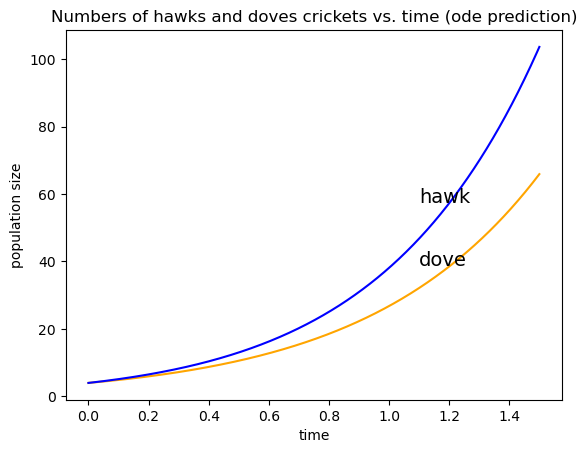

In [58]:
# Your code here
F=np.array([[3,1],[5,0]])
ninit=[4,4]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,ninit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'dove',fontsize=14)
plt.text(1.1,n[800,1], r'hawk',fontsize=14)
plt.ylabel('population size')
plt.title("Numbers of hawks and doves crickets vs. time (ode prediction)")

Text(0.5, 1.0, 'Theta vs Time')

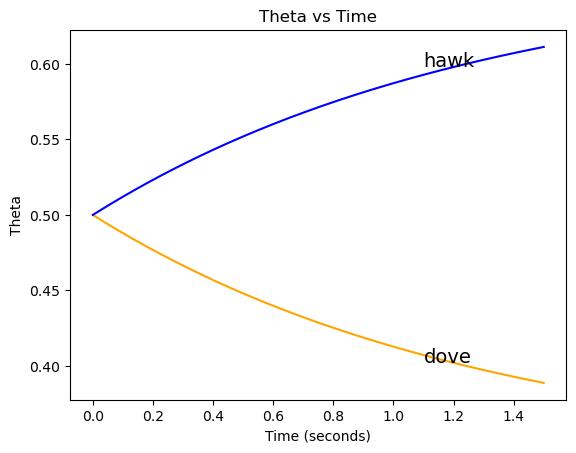

In [64]:
F = np.array([[3,1],[5,0]])
init = [0.5, 0.5]
t=np.linspace(0.0,1.5, 1000)

new_theta = odeint(integrate, init, t)

plt.plot(t,new_theta[:,0],'orange')
plt.plot(t,new_theta[:,1],'blue')
plt.text(1.1,new_theta[800,0], r'dove',fontsize=14)
plt.text(1.1,new_theta[800,1], r'hawk',fontsize=14)
plt.xlabel('Time (seconds)')
plt.ylabel('Theta')
plt.title('Theta vs Time')

Text(0.5, 1.0, 'h[theta] vs Time')

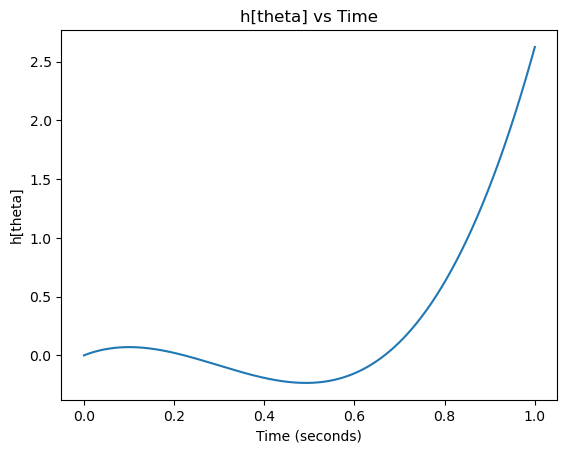

In [68]:
t = np.linspace(0.0, 1.0, 1000)

theta = [integrate2([x, 1-x])[0] for x in time]
plt.plot(t, theta)
plt.xlabel('Time (seconds)')
plt.ylabel('h[theta]')
plt.title('h[theta] vs Time')

__Answer__:

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 5</SPAN>** 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 6:</SPAN>**  Find a 3x3 fitness matrix $F$ and an initial condition for an evolutionary game with three types of individuals such that the solution $\theta$ has a limit cycle, not just converging to a limit point.  Does the limit cycle depend on the intial state for your fitness matrix?  

Hint 1: Adapt the code you wrote for Problem 4.

Hint 2: Solve this problem by trial and error, i.e. trying different values of the entries in the fitness matrix. Think of the three types of individuals as three kinds of animals. What kind of relationship among these three animals would likely to cause an oscillating population for each animal?

Text(0.5, 1.0, 'Theta vs. Time')

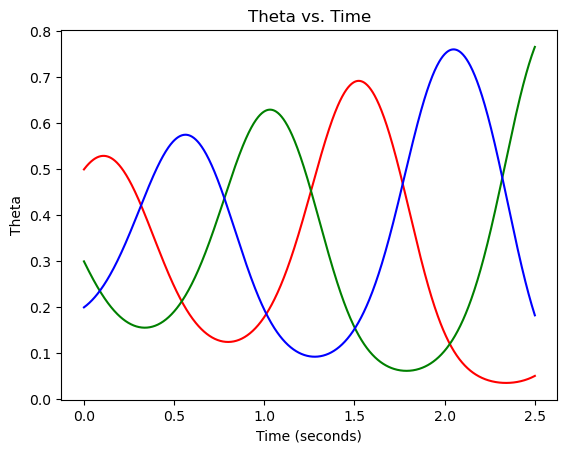

In [74]:
# Your code here
F = np.array([[1,8,-9], [-9,1,8], [8, -9, 1]])

def integrate3(theta,t):
    f_theta = np.dot(F, theta)
    second_term = np.tile(theta, (3,1))
    return theta*(f_theta - np.dot(second_term, f_theta))

init = [0.5, 0.3, 0.2]
t=np.linspace(0.0,2.5, 1000)

new_theta = odeint(integrate3, init, t)

plt.plot(t,new_theta[:,0],'red')
plt.plot(t,new_theta[:,1],'green')
plt.plot(t,new_theta[:,2],'blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Theta')
plt.title("Theta vs. Time")

__Answer__:  the limit cycle does not depend on the intial state of the fitness matrix

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 6</SPAN>** 

For this week's lab, please answer all questions 1-6.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 